# IMDB (Internet Movie Database)

## [Keras Dataset](https://keras.io/datasets/)

IMDB Movie reviews sentiment classification

- Reviews de 25.000 peliculas de IMDB
- Etiquetadas por sentimiento (Positivo/Negativo)
- Los reviews ya estan pre-procesados
- Cada review esta codificado como una secuencia de indices de palabras (integers)
- Los indices estan ordenados por frecuencia. Es decir que la palabra que tiene el índice 3 es la 3er palabra mas frecuente.
- 0 no es el indice de una palabra específica sino que se usa para codificar las palabras desconocidas

In [1]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from keras import optimizers
from keras.callbacks import ModelCheckpoint 
from fnn_helper import PlotLosses
from keras import regularizers
%matplotlib inline

np.random.seed(42)

Using TensorFlow backend.


## Cargo Dataset

In [2]:
# Loading the data (it's preloaded in Keras)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)


## Imprimo muestra

In [3]:
print('Review:')
print(x_train[0])
print()
print('Sentimiento:')
print(y_train[0])

Review:
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]

Sentimiento:
1


In [4]:
# Turning the output into vector mode, each of length 1000
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print(x_train.shape)
print(x_test.shape)

(25000, 1000)
(25000, 1000)


In [5]:
x_train[0]

array([ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0

In [6]:
# One-hot encoding the output
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [7]:
input_size = x_train.shape[1]
output_size = y_train.shape[1]

### Método para armar modelos

In [8]:
def build_model(layers, optimizer_method, lr=0.1, decay=0.0):
    # Armar el modelo
    # Cual es la dimension de entrada?
    #  - Tenemos 1000 entradas, cada una correspondiente a una palabra (input_size)

    # Cual es la cantidad de salidas?
    #  - 2 salidas: una para cada sentimiento (positivo y negativo)

    model = Sequential()
    for layer in layers:
        model.add(layer)

    # Juegue cambiando el optimizer. Recomendados: 'sgd', 'adam', 'rmsprop'
    optimizer = optimizer_method(lr=lr, decay=decay)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    model.summary()

    return model


### Método para entrenar modelos

In [9]:
def train_model(model, weights_file=None, batch_size=16, epochs=10):
    plot_losses = PlotLosses(plot_interval=2, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)
    callbacks = [plot_losses]

    if weights_file != None:
        checkpointer = ModelCheckpoint(filepath=weights_file, verbose=0, save_best_only=True)
        callbacks.append(checkpointer)


    model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test), 
        verbose=2,
        callbacks=callbacks,
    )


### Método para evaluar el modelo entrenado

In [10]:
def eval_model(model, weights_file=None):
    score = model.evaluate(x_test, y_test, verbose=0)
    print("/--------------------------\\\n| Accuracy:      ", score[1], " |")
    
    if weights_file != None:
        model.load_weights(weights_file)
        score = model.evaluate(x_test, y_test, verbose=0)
        print("| Best Accuracy: ", score[1], " |")
        
    print("\\--------------------------/\n")


## Evaluación de distintos modelos

### 1. Una capa densa de menor tamaño que la cantidad de entradas y una capa densa de salida

In [11]:
model = build_model(
    [
        Dense(100,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dense(output_size,                activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 100)               100100    
_________________________________________________________________
Salida (Dense)               (None, 2)                 202       
Total params: 100,302
Trainable params: 100,302
Non-trainable params: 0
_________________________________________________________________


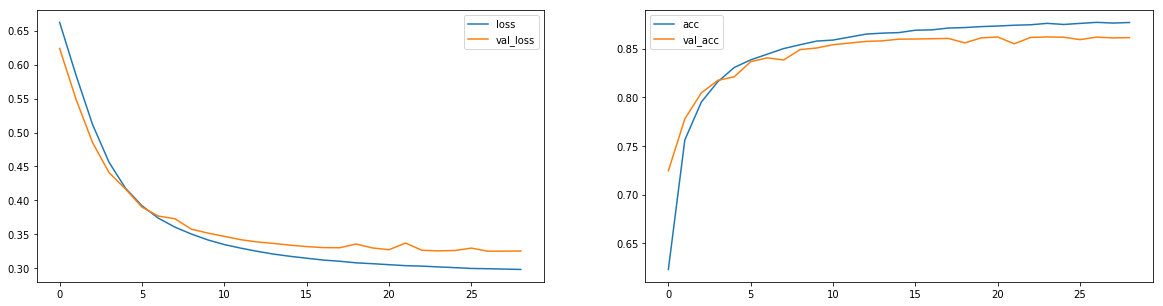

4s - loss: 0.2984 - acc: 0.8769 - val_loss: 0.3256 - val_acc: 0.8614
Epoch 30/30
3s - loss: 0.2976 - acc: 0.8786 - val_loss: 0.3254 - val_acc: 0.8616
/--------------------------\
| Accuracy:       0.86164  |
| Best Accuracy:  0.86188  |
\--------------------------/



In [12]:
filename = 'imdb_model_1.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=30)
eval_model(model, weights_file=filename)

### 2. Achico la primera capa densa a la mitad

In [13]:
model = build_model(
    [
        Dense(50,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dense(output_size,                activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 50)                50050     
_________________________________________________________________
Salida (Dense)               (None, 2)                 102       
Total params: 50,152
Trainable params: 50,152
Non-trainable params: 0
_________________________________________________________________


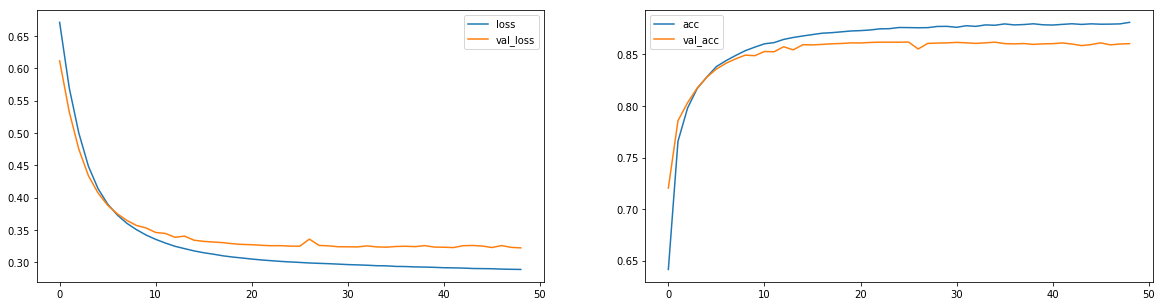

4s - loss: 0.2892 - acc: 0.8810 - val_loss: 0.3225 - val_acc: 0.8603
Epoch 50/50
3s - loss: 0.2888 - acc: 0.8800 - val_loss: 0.3232 - val_acc: 0.8606
/--------------------------\
| Accuracy:       0.86064  |
| Best Accuracy:  0.86032  |
\--------------------------/



In [14]:
filename = 'imdb_model_2.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=50)
eval_model(model, weights_file=filename)

### 3. Agrando la primera capa densa a 500

In [15]:
model = build_model(
    [
        Dense(500,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dense(output_size,                activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 500)               500500    
_________________________________________________________________
Salida (Dense)               (None, 2)                 1002      
Total params: 501,502
Trainable params: 501,502
Non-trainable params: 0
_________________________________________________________________


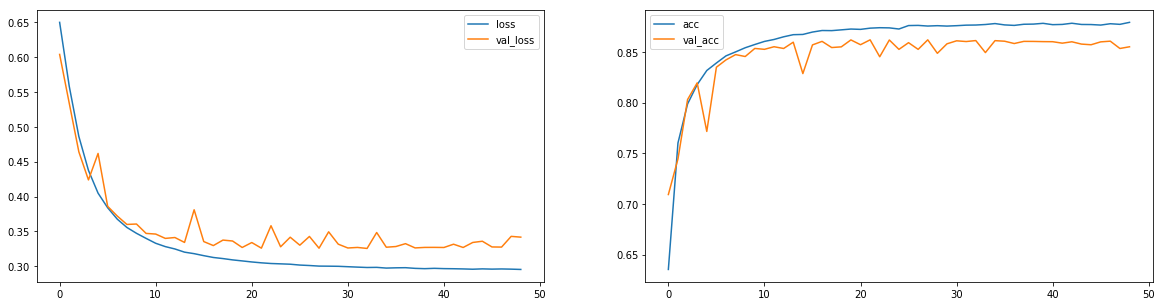

5s - loss: 0.2955 - acc: 0.8792 - val_loss: 0.3419 - val_acc: 0.8551
Epoch 50/50
5s - loss: 0.2955 - acc: 0.8778 - val_loss: 0.3275 - val_acc: 0.8602
/--------------------------\
| Accuracy:       0.86024  |
| Best Accuracy:  0.8612  |
\--------------------------/



In [16]:
filename = 'imdb_model_3.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=50)
eval_model(model, weights_file=filename)

### 4. Sigo agrandando la primera capa densa

In [17]:
model = build_model(
    [
        Dense(1500,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dense(output_size,                 activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1500)              1501500   
_________________________________________________________________
Salida (Dense)               (None, 2)                 3002      
Total params: 1,504,502
Trainable params: 1,504,502
Non-trainable params: 0
_________________________________________________________________


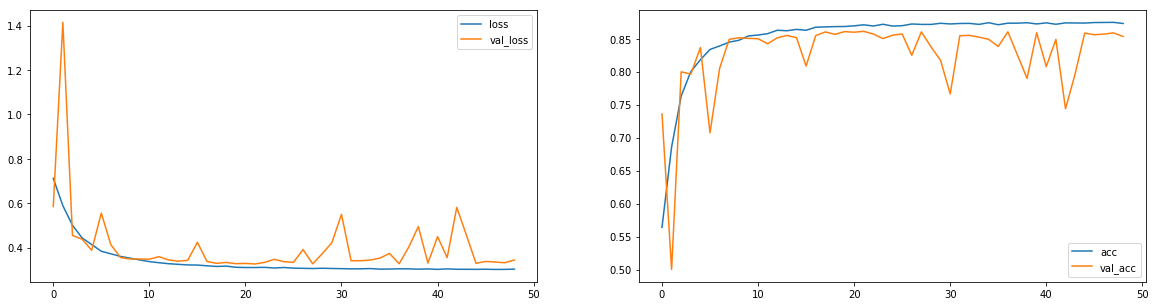

8s - loss: 0.3031 - acc: 0.8732 - val_loss: 0.3443 - val_acc: 0.8535
Epoch 50/50
8s - loss: 0.3023 - acc: 0.8749 - val_loss: 0.3301 - val_acc: 0.8600
/--------------------------\
| Accuracy:       0.85996  |
| Best Accuracy:  0.86136  |
\--------------------------/



In [18]:
filename = 'imdb_model_4.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=50)
eval_model(model, weights_file=filename)

### 5. Agrego dropout después de la primera capa densa

In [19]:
model = build_model(
    [
        Dense(1500,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dropout(0.1,                                             name='Dropout'),
        Dense(output_size,                 activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1500)              1501500   
_________________________________________________________________
Dropout (Dropout)            (None, 1500)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 3002      
Total params: 1,504,502
Trainable params: 1,504,502
Non-trainable params: 0
_________________________________________________________________


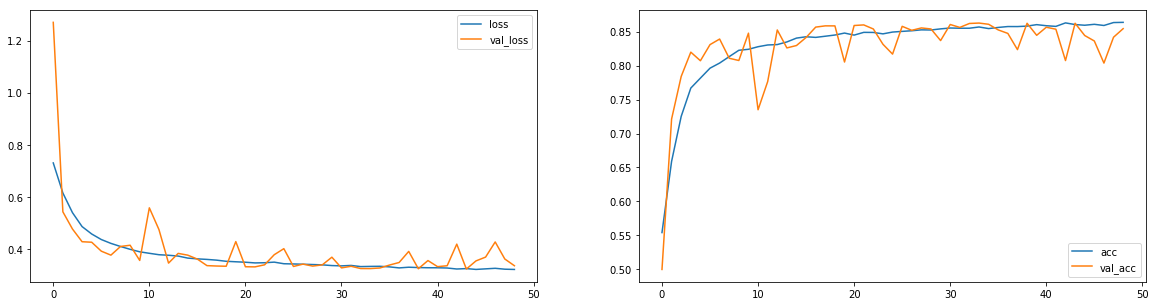

8s - loss: 0.3221 - acc: 0.8635 - val_loss: 0.3363 - val_acc: 0.8542
Epoch 50/50
8s - loss: 0.3205 - acc: 0.8625 - val_loss: 0.3271 - val_acc: 0.8612
/--------------------------\
| Accuracy:       0.86124  |
| Best Accuracy:  0.86216  |
\--------------------------/



In [20]:
filename = 'imdb_model_5.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=50)
eval_model(model, weights_file=filename)

### 6. Mejoró, pero son muchos parámetros. Bajo a 1200 la primera capa densa

In [21]:
model = build_model(
    [   Dense(1200, input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dropout(0.1,                                            name='Dropout'),
        Dense(output_size,                activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.001, decay=0.000001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1200)              1201200   
_________________________________________________________________
Dropout (Dropout)            (None, 1200)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 2402      
Total params: 1,203,602
Trainable params: 1,203,602
Non-trainable params: 0
_________________________________________________________________


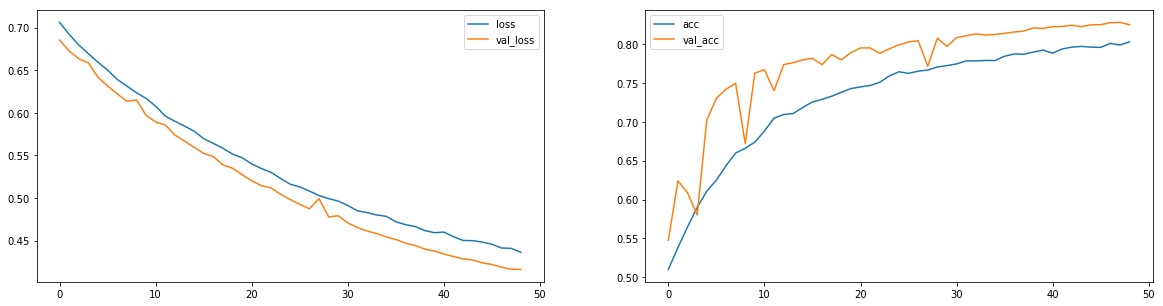

7s - loss: 0.4364 - acc: 0.8030 - val_loss: 0.4162 - val_acc: 0.8251
Epoch 50/50
7s - loss: 0.4363 - acc: 0.8027 - val_loss: 0.4123 - val_acc: 0.8287
/--------------------------\
| Accuracy:       0.82868  |
| Best Accuracy:  0.82868  |
\--------------------------/



In [22]:
filename = 'imdb_model_6.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=50)
eval_model(model, weights_file=filename)

### 7. Pruebo agregar regularización L2

In [23]:
lambda_l2 = 0.01
regularizer = regularizers.l2(lambda_l2)

model = build_model(
    [   Dense(1200, input_dim=input_size, activation='sigmoid', name='Entrada',
            kernel_regularizer=regularizer, 
            bias_regularizer=regularizer),
     
        Dropout(0.1,                                            name='Dropout'),
     
        Dense(output_size,                activation='softmax', name='Salida',
            kernel_regularizer=regularizer, 
            bias_regularizer=regularizer),
    ],
    optimizers.SGD,
    lr=0.001, decay=0.00001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1200)              1201200   
_________________________________________________________________
Dropout (Dropout)            (None, 1200)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 2402      
Total params: 1,203,602
Trainable params: 1,203,602
Non-trainable params: 0
_________________________________________________________________


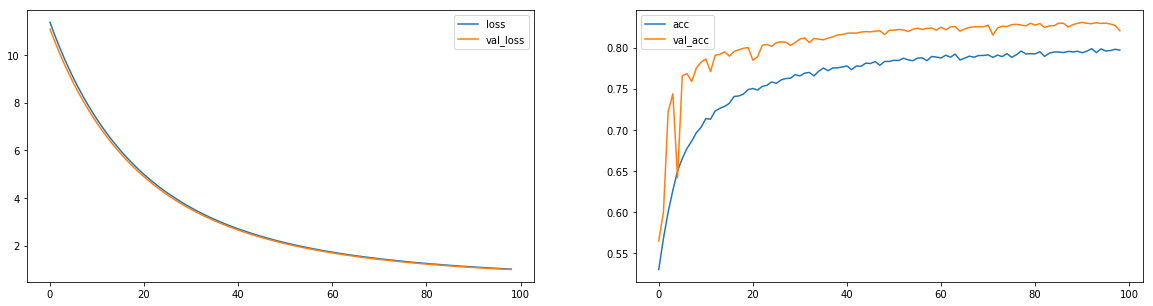

19s - loss: 1.0167 - acc: 0.7969 - val_loss: 1.0025 - val_acc: 0.8204
Epoch 100/100
18s - loss: 1.0114 - acc: 0.7932 - val_loss: 0.9865 - val_acc: 0.8286
/--------------------------\
| Accuracy:       0.82864  |
| Best Accuracy:  0.82864  |
\--------------------------/



In [24]:
filename = 'imdb_model_7.hdf5'
train_model(model, weights_file=filename, batch_size=20, epochs=100)
eval_model(model, weights_file=filename)

### 8. Pruebo con otro optimizer

In [31]:
lambda_l2 = 0.01
regularizer = regularizers.l2(lambda_l2)

model = build_model(
    [   Dense(1200, input_dim=input_size, activation='sigmoid', name='Entrada',
            kernel_regularizer=regularizer, 
            bias_regularizer=regularizer),
     
        Dropout(0.15,                                           name='Dropout'),
     
        Dense(output_size,                activation='softmax', name='Salida',
            kernel_regularizer=regularizer, 
            bias_regularizer=regularizer),
    ],
    optimizers.Adamax,
    lr=0.001, decay=0.00001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 1200)              1201200   
_________________________________________________________________
Dropout (Dropout)            (None, 1200)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 2402      
Total params: 1,203,602
Trainable params: 1,203,602
Non-trainable params: 0
_________________________________________________________________


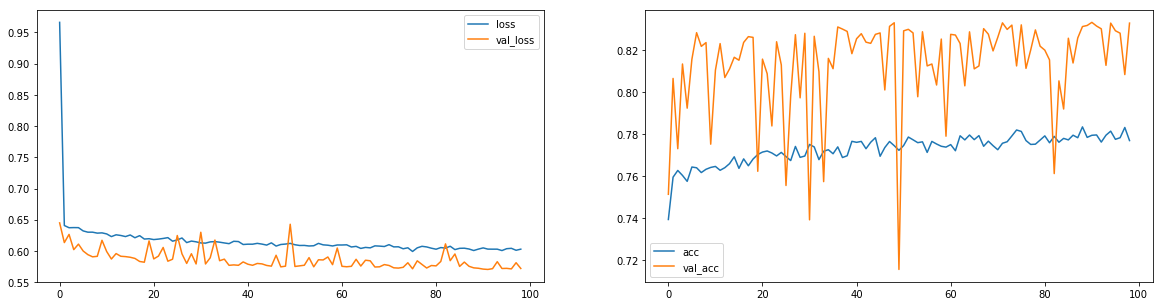

20s - loss: 0.6029 - acc: 0.7768 - val_loss: 0.5720 - val_acc: 0.8328
Epoch 100/100
20s - loss: 0.6005 - acc: 0.7828 - val_loss: 0.5843 - val_acc: 0.8039
/--------------------------\
| Accuracy:       0.80392  |
| Best Accuracy:  0.8314  |
\--------------------------/



In [32]:
filename = 'imdb_model_8.hdf5'
train_model(model, weights_file=filename, batch_size=20, epochs=100)
eval_model(model, weights_file=filename)

### 9. Vuelvo a agrandar la primera capa que me dio buenos resultados

In [33]:
model = build_model(
    [
        Dense(2000,  input_dim=input_size, activation='sigmoid', name='Entrada'),
        Dropout(0.1,                                             name='Dropout'),
        Dense(output_size,                 activation='softmax', name='Salida'),
    ],
    optimizers.SGD,
    lr=0.005, decay=0.00001)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (Dense)              (None, 2000)              2002000   
_________________________________________________________________
Dropout (Dropout)            (None, 2000)              0         
_________________________________________________________________
Salida (Dense)               (None, 2)                 4002      
Total params: 2,006,002
Trainable params: 2,006,002
Non-trainable params: 0
_________________________________________________________________


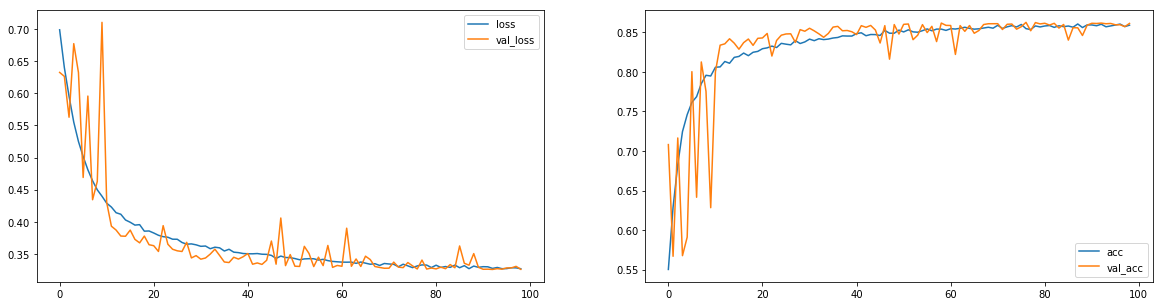

12s - loss: 0.3271 - acc: 0.8592 - val_loss: 0.3262 - val_acc: 0.8614
Epoch 100/100
11s - loss: 0.3241 - acc: 0.8619 - val_loss: 0.3275 - val_acc: 0.8600
/--------------------------\
| Accuracy:       0.86004  |
| Best Accuracy:  0.8618  |
\--------------------------/



In [34]:
filename = 'imdb_model_9.hdf5'
train_model(model, weights_file=filename, batch_size=32, epochs=100)
eval_model(model, weights_file=filename)